## Research Questions

#### Given data from historical NFL games...

#### 1. What is the most significant variable impacting a team's ability to cover the spread?

#### 2. How can I use this information to create a model that can predict the winner of a given NFL game in 2020

## Data Collection and Cleaning

### Data Collection

In [1]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

##Reading the dataset into a pandas DF
nfl_spreadspoke = pd.read_csv('spreadspoke_scores.csv')

In [2]:
nfl_spreadspoke.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


### Beginning the data cleaning process.

#### 1. Remove unnecessary columns
 - Going across the columns, I do not need the following columns for my finalized data set
    - schedule_date: do not need, the week number matters more
    - schedule_season: redundant because I already have the week number
    - over_under_line: do not want to calculate statistics for over/under
    - stadium: redundant because I already have the home/away team
    - stadium_neutral: do not want to analyze
    - weather_humidity: do not want to analyze
    - weather_detail: do not want to analyze

 - **I can remove all of these columns to increase the readibility of the data frame**

**These are the current columns**

In [3]:
print(nfl_spreadspoke.columns)

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail'],
      dtype='object')


**Removing unwanted columns and slightly altering order of columns**

In [4]:
nfl_spreadspoke = nfl_spreadspoke[['schedule_week', 'schedule_playoff',
       'team_home', 'team_away','team_favorite_id','spread_favorite','score_home', 'score_away',
        'weather_temperature', 'weather_wind_mph']]
print(nfl_spreadspoke.columns)

Index(['schedule_week', 'schedule_playoff', 'team_home', 'team_away',
       'team_favorite_id', 'spread_favorite', 'score_home', 'score_away',
       'weather_temperature', 'weather_wind_mph'],
      dtype='object')


**New Dataframe**

In [5]:
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph
0,1,False,Miami Dolphins,Oakland Raiders,NaN,NaN,14,23,83.0,6.0
1,1,False,Houston Oilers,Denver Broncos,NaN,NaN,45,7,81.0,7.0
2,1,False,San Diego Chargers,Buffalo Bills,NaN,NaN,27,7,70.0,7.0
3,2,False,Miami Dolphins,New York Jets,NaN,NaN,14,19,82.0,11.0
4,1,False,Green Bay Packers,Baltimore Colts,NaN,NaN,24,3,64.0,8.0


#### 2. Making sure each row has the data I need
 - Looking through the dataframe, there are some rows that do not have point spread data
 - I need to isolate and delete all rows without this data
 - There are also nan values in some weather columns. These should be filled with room temperature and 0 mph wind

In [6]:
nfl_spreadspoke = nfl_spreadspoke.dropna(axis=0,subset=['team_favorite_id','spread_favorite'])
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph
170,Superbowl,True,Green Bay Packers,Kansas City Chiefs,GB,-14.0,35,10,54.0,7.0
350,Superbowl,True,Green Bay Packers,Oakland Raiders,GB,-13.5,33,14,60.0,12.0
538,Superbowl,True,Baltimore Colts,New York Jets,IND,-18.0,7,16,66.0,12.0
727,Superbowl,True,Kansas City Chiefs,Minnesota Vikings,MIN,-12.0,23,7,55.0,14.0
916,Superbowl,True,Baltimore Colts,Dallas Cowboys,IND,-2.5,16,13,59.0,11.0


**I now need to fill nan values with room temperature (70) and 0 mph wind**

In [7]:
values = {'weather_temperature':70.0,'weather_wind_mph':0.0}
nfl_spreadspoke = nfl_spreadspoke.fillna(value = values)
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph
170,Superbowl,True,Green Bay Packers,Kansas City Chiefs,GB,-14.0,35,10,54.0,7.0
350,Superbowl,True,Green Bay Packers,Oakland Raiders,GB,-13.5,33,14,60.0,12.0
538,Superbowl,True,Baltimore Colts,New York Jets,IND,-18.0,7,16,66.0,12.0
727,Superbowl,True,Kansas City Chiefs,Minnesota Vikings,MIN,-12.0,23,7,55.0,14.0
916,Superbowl,True,Baltimore Colts,Dallas Cowboys,IND,-2.5,16,13,59.0,11.0


**To ensure that every spread_favorite has a numerical value, I want to print the frequency of each value.**

In [8]:
print(nfl_spreadspoke['spread_favorite'].value_counts())

-3.0     1570
-3.5      801
-7.0      726
-2.5      651
-6.0      566
-4.0      564
-1.0      502
-6.5      500
-2.0      457
-4.5      358
-5.5      345
-5.0      316
-1.5      313
-7.5      312
-10.0     291
-9.0      255
-8.0      231
-9.5      193
-8.5      165
-10.5     155
 0.0      143
-11.0     121
-13.0     107
-13.5     107
-14.0      91
-12.0      69
-11.5      57
-14.5      51
-12.5      50
-17.0      24
-15.0      23
-16.0      20
-16.5      18
-15.5      16
-18.0       9
-17.5       5
-18.5       3
-20.0       3
-20.5       2
-19.0       2
-21.0       1
-26.5       1
-19.5       1
-24.5       1
-21.5       1
-24.0       1
-22.5       1
Name: spread_favorite, dtype: int64


**Now every value in this column is an integer.**

#### 3. There are many teams that no longer exist in the df. I want to update the df to make all team names current

In [9]:
nfl_spreadspoke['team_home'].value_counts()

New England Patriots    356
San Francisco 49ers     356
Dallas Cowboys          349
Pittsburgh Steelers     349
Denver Broncos          347
Philadelphia Eagles     346
Green Bay Packers       345
Miami Dolphins          343
Chicago Bears           338
Minnesota Vikings       338
New York Giants         337
Washington Redskins     337
Seattle Seahawks        337
Kansas City Chiefs      336
New Orleans Saints      334
Buffalo Bills           334
Cincinnati Bengals      332
Atlanta Falcons         331
Tampa Bay Buccaneers    330
New York Jets           327
Detroit Lions           324
San Diego Chargers      310
Cleveland Browns        305
Indianapolis Colts      301
Oakland Raiders         232
Arizona Cardinals       213
Carolina Panthers       207
Jacksonville Jaguars    204
Baltimore Ravens        200
St. Louis Rams          175
Tennessee Titans        172
Los Angeles Rams        163
Houston Texans          150
Houston Oilers          144
Los Angeles Raiders     105
St. Louis Cardinals 

In [10]:
nfl_spreadspoke = nfl_spreadspoke.replace("Baltimore Colts","Indianapolis Colts")
nfl_spreadspoke = nfl_spreadspoke.replace("Washington Redskins","Washington Football Team")
nfl_spreadspoke = nfl_spreadspoke.replace("St. Louis Rams","Los Angeles Rams")
nfl_spreadspoke = nfl_spreadspoke.replace("Phoenix Cardinals","Arizona Cardinals")
nfl_spreadspoke = nfl_spreadspoke.replace("Tennessee Oilers","Tennessee Titans")
nfl_spreadspoke = nfl_spreadspoke.replace("San Diego Chargers","Los Angeles Chargers")
nfl_spreadspoke = nfl_spreadspoke.replace("Houston Oilers","Houston Texans")
nfl_spreadspoke = nfl_spreadspoke.replace("St. Louis Cardinals","Arizona Cardinals")
nfl_spreadspoke = nfl_spreadspoke.replace("Los Angeles Raiders","Las Vegas Raiders")
nfl_spreadspoke = nfl_spreadspoke.replace("Oakland Raiders","Las Vegas Raiders")
nfl_spreadspoke = nfl_spreadspoke.replace("OAK","LV")
nfl_spreadspoke = nfl_spreadspoke.replace("SuperBowl","Superbowl")
nfl_spreadspoke = nfl_spreadspoke.replace("WildCard","Wildcard")
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph
170,Superbowl,True,Green Bay Packers,Kansas City Chiefs,GB,-14.0,35,10,54.0,7.0
350,Superbowl,True,Green Bay Packers,Las Vegas Raiders,GB,-13.5,33,14,60.0,12.0
538,Superbowl,True,Indianapolis Colts,New York Jets,IND,-18.0,7,16,66.0,12.0
727,Superbowl,True,Kansas City Chiefs,Minnesota Vikings,MIN,-12.0,23,7,55.0,14.0
916,Superbowl,True,Indianapolis Colts,Dallas Cowboys,IND,-2.5,16,13,59.0,11.0


#### 4. Change values in team_home and team_away to the team id's
 - Will make it easier to work with since there will be no spaces and the teams will all be represented by their id's

**Current values for team_home (formatting is the same for team_away)**

In [11]:
print(nfl_spreadspoke['team_home'])

170        Green Bay Packers
350        Green Bay Packers
538       Indianapolis Colts
727       Kansas City Chiefs
916       Indianapolis Colts
                ...         
12673      Green Bay Packers
12674     Kansas City Chiefs
12675     Kansas City Chiefs
12676    San Francisco 49ers
12677     Kansas City Chiefs
Name: team_home, Length: 10199, dtype: object


**Import a new data frame that includes 32 rows for the names and id's of each NFL team**

In [12]:
teams = pd.read_csv('nfl_teams.csv')
teams.head()

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South


**I need to rename the name column to be team_home so I can merge based on the home team.
I also only need the team_home and abbreviation column so I can take all other columns out of the teams df**

In [13]:
teams = teams.rename(columns={'Name': 'team_home','Abbreviation': 'team_home_id'})
teams = teams[['team_home','team_home_id']]
teams.head()

,team_home,team_home_id
0,Arizona Cardinals,ARI
1,Atlanta Falcons,ATL
2,Baltimore Ravens,BAL
3,Buffalo Bills,BUF
4,Carolina Panthers,CAR


**The teams df has the New York teams as NY Jets/Giants but my main df has them as New York Jets/Giants**

In [14]:
teams = teams.replace('NY Jets', 'New York Jets')
teams = teams.replace('NY Giants', 'New York Giants')
teams.head()

,team_home,team_home_id
0,Arizona Cardinals,ARI
1,Atlanta Falcons,ATL
2,Baltimore Ravens,BAL
3,Buffalo Bills,BUF
4,Carolina Panthers,CAR


**I want to merge the two df based on the team_home columns. A new column 'team_home_id' should appear as a new column in nfl_spreadspoke**

In [15]:
nfl_spreadspoke = pd.merge(nfl_spreadspoke, teams, how='left',on = 'team_home')
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph,team_home_id
0,Superbowl,True,Green Bay Packers,Kansas City Chiefs,GB,-14.0,35,10,54.0,7.0,GB
1,Superbowl,True,Green Bay Packers,Las Vegas Raiders,GB,-13.5,33,14,60.0,12.0,GB
2,Superbowl,True,Indianapolis Colts,New York Jets,IND,-18.0,7,16,66.0,12.0,IND
3,Superbowl,True,Kansas City Chiefs,Minnesota Vikings,MIN,-12.0,23,7,55.0,14.0,KC
4,Superbowl,True,Indianapolis Colts,Dallas Cowboys,IND,-2.5,16,13,59.0,11.0,IND


**Now I want to do the same thing for the away teams**

In [16]:
teams = teams.rename(columns={'team_home': 'team_away','team_home_id': 'team_away_id'})
teams.head()

,team_away,team_away_id
0,Arizona Cardinals,ARI
1,Atlanta Falcons,ATL
2,Baltimore Ravens,BAL
3,Buffalo Bills,BUF
4,Carolina Panthers,CAR


In [17]:
nfl_spreadspoke = pd.merge(nfl_spreadspoke, teams, how='left',on = 'team_away')
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph,team_home_id,team_away_id
0,Superbowl,True,Green Bay Packers,Kansas City Chiefs,GB,-14.0,35,10,54.0,7.0,GB,KC
1,Superbowl,True,Green Bay Packers,Las Vegas Raiders,GB,-13.5,33,14,60.0,12.0,GB,LV
2,Superbowl,True,Indianapolis Colts,New York Jets,IND,-18.0,7,16,66.0,12.0,IND,NYJ
3,Superbowl,True,Kansas City Chiefs,Minnesota Vikings,MIN,-12.0,23,7,55.0,14.0,KC,MIN
4,Superbowl,True,Indianapolis Colts,Dallas Cowboys,IND,-2.5,16,13,59.0,11.0,IND,DAL


**I do not need the team_home or team_away columns anymore**

In [18]:
nfl_spreadspoke = nfl_spreadspoke[['schedule_week', 'schedule_playoff',
       'team_home_id', 'team_away_id','team_favorite_id','spread_favorite','score_home', 'score_away',
        'weather_temperature', 'weather_wind_mph']]
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph
0,Superbowl,True,GB,KC,GB,-14.0,35,10,54.0,7.0
1,Superbowl,True,GB,LV,GB,-13.5,33,14,60.0,12.0
2,Superbowl,True,IND,NYJ,IND,-18.0,7,16,66.0,12.0
3,Superbowl,True,KC,MIN,MIN,-12.0,23,7,55.0,14.0
4,Superbowl,True,IND,DAL,IND,-2.5,16,13,59.0,11.0


#### 5. Combine the score_home and score_away into one column called actual_spread_favorite that I can then use to make a final column called favorite_covered

**First, I want to rename spread_favorite**

In [19]:
nfl_spreadspoke = nfl_spreadspoke.rename(columns={'spread_favorite':'expected_spread_favorite'})
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph
0,Superbowl,True,GB,KC,GB,-14.0,35,10,54.0,7.0
1,Superbowl,True,GB,LV,GB,-13.5,33,14,60.0,12.0
2,Superbowl,True,IND,NYJ,IND,-18.0,7,16,66.0,12.0
3,Superbowl,True,KC,MIN,MIN,-12.0,23,7,55.0,14.0
4,Superbowl,True,IND,DAL,IND,-2.5,16,13,59.0,11.0


**Now I can create a new column that is the difference between the underdog score and the favorite score**

In [20]:
actual_spread_favorite = []
for index, row in nfl_spreadspoke.iterrows():
    if row['team_favorite_id'] == row['team_home_id']:
        actual_spread_favorite.append(row['score_away'] - row['score_home'])
    else:
        actual_spread_favorite.append(row['score_home'] - row['score_away'])
nfl_spreadspoke['actual_spread_favorite'] = actual_spread_favorite
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,score_home,score_away,weather_temperature,weather_wind_mph,actual_spread_favorite
0,Superbowl,True,GB,KC,GB,-14.0,35,10,54.0,7.0,-25
1,Superbowl,True,GB,LV,GB,-13.5,33,14,60.0,12.0,-19
2,Superbowl,True,IND,NYJ,IND,-18.0,7,16,66.0,12.0,9
3,Superbowl,True,KC,MIN,MIN,-12.0,23,7,55.0,14.0,16
4,Superbowl,True,IND,DAL,IND,-2.5,16,13,59.0,11.0,-3


**I can reorganize the data so I do not need score_home and score_away**

In [21]:
nfl_spreadspoke = nfl_spreadspoke[['schedule_week', 'schedule_playoff',
       'team_home_id', 'team_away_id','team_favorite_id','expected_spread_favorite', 'actual_spread_favorite',
        'weather_temperature', 'weather_wind_mph']]
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,actual_spread_favorite,weather_temperature,weather_wind_mph
0,Superbowl,True,GB,KC,GB,-14.0,-25,54.0,7.0
1,Superbowl,True,GB,LV,GB,-13.5,-19,60.0,12.0
2,Superbowl,True,IND,NYJ,IND,-18.0,9,66.0,12.0
3,Superbowl,True,KC,MIN,MIN,-12.0,16,55.0,14.0
4,Superbowl,True,IND,DAL,IND,-2.5,-3,59.0,11.0


**I can use expected_spread_favorite and actual_spread_favorite to figure out if the favorite team covered the spread**

In [22]:
favorite_covered = []
for index, row in nfl_spreadspoke.iterrows():
    favorite_covered.append(row['expected_spread_favorite'] > row['actual_spread_favorite'])
nfl_spreadspoke['favorite_covered'] = favorite_covered
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,actual_spread_favorite,weather_temperature,weather_wind_mph,favorite_covered
0,Superbowl,True,GB,KC,GB,-14.0,-25,54.0,7.0,True
1,Superbowl,True,GB,LV,GB,-13.5,-19,60.0,12.0,True
2,Superbowl,True,IND,NYJ,IND,-18.0,9,66.0,12.0,False
3,Superbowl,True,KC,MIN,MIN,-12.0,16,55.0,14.0,False
4,Superbowl,True,IND,DAL,IND,-2.5,-3,59.0,11.0,True


**I do not need actual_spread_favorite anymore**

In [23]:
nfl_spreadspoke = nfl_spreadspoke[['schedule_week', 'schedule_playoff',
       'team_home_id', 'team_away_id','team_favorite_id','expected_spread_favorite', 'favorite_covered',
        'weather_temperature', 'weather_wind_mph']]
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,favorite_covered,weather_temperature,weather_wind_mph
0,Superbowl,True,GB,KC,GB,-14.0,True,54.0,7.0
1,Superbowl,True,GB,LV,GB,-13.5,True,60.0,12.0
2,Superbowl,True,IND,NYJ,IND,-18.0,False,66.0,12.0
3,Superbowl,True,KC,MIN,MIN,-12.0,False,55.0,14.0
4,Superbowl,True,IND,DAL,IND,-2.5,True,59.0,11.0


**I want to create an attribute who_won next to favorite_covered**

In [24]:
who_covered = [row['team_home_id'] if row['team_home_id'] == row['team_favorite_id'] and row['favorite_covered'] == True else row['team_away_id'] for index, row in nfl_spreadspoke.iterrows()]

In [25]:
nfl_spreadspoke['who_covered'] = who_covered

In [26]:
nfl_spreadspoke.head()

,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,favorite_covered,weather_temperature,weather_wind_mph,who_covered
0,Superbowl,True,GB,KC,GB,-14.0,True,54.0,7.0,GB
1,Superbowl,True,GB,LV,GB,-13.5,True,60.0,12.0,GB
2,Superbowl,True,IND,NYJ,IND,-18.0,False,66.0,12.0,NYJ
3,Superbowl,True,KC,MIN,MIN,-12.0,False,55.0,14.0,MIN
4,Superbowl,True,IND,DAL,IND,-2.5,True,59.0,11.0,IND


## Data Description

In the dataset, each observation represents an NFL game ordered by data, starting in 1966 and ending at the previous 2019-2020 season. Each column represents a specific attrbute of the game. For example, who was the home/away team?, which team was favorited?, what was the spread?, the weather of the game, etc.

This dataset was created so that I could analyze gambling trends in the data. I use the spread the columns as input variables that influene the output variable that I created - does the favorite cover?

This data represents the entire population of NFL games since 1966. However, during preprocessing, I reduced the population to only games that contained data on the spread of the game because that was a main input variable that is necessary for my research question.

The final dataset is a merged version of two datasets both downloaded from Kaggle. The two raw datasets can be found at https://cornell.box.com/s/43vygli52m76sn1hw68oby4y39ilxqf2 and https://cornell.box.com/s/pvestzdvfbai6eoygin1yh87o0r1heb8.

NFL spreads are not objective numbers rather each casino or sportsbook generates a slightly different line for each game. Therefore, the spreads in this dataset are not the only possible list of spreads for these NFL games. The data was most likely taken from a sportsbook API. There could be some bias in how the book generates the lines; however, this is not a major concern because it is in the book's best interest to generate the most fair possible spread. The rest of the data attributes are objective (ie. weather, who played, score, date, etc.).

During my data cleaning phase, I removed columns that I did not deem to be necessary for analysis. I also combined columns and used data from attributes to make new columns that are more significant to exploration of my research question.

My datasets were created by Kaggle and can be found at this link: https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data

## Data Limitations

Creatively identifies potential harms and data gaps, and describes how these could affect the meaning of results, and the impact of results on people. It is evident that significant thought has been put into the limitations of the collected data.

The main limitation of my data is the lack of quantitative data available in my dataset. Most of the attributes are qualitative variables which makes it difficult to perform functions on them or find correlations between two or more attributes. I discovered this limitatiton when performing my exploratory data analysis. At that point, it was too late for me to look for additional data that I could add to my dataset. In the next phase, I might add more quantitative variables to my dataset to perform more data analysis before I begin modeling.

The lack of quantitative data will impact the accuracy of my eventual model that I create to attempt to predict the outcome of any NFL game based on the spread. I do not know how regression models or machine learning models perform with mainly qualitative data, but I think it is significant to inform any potential users of the model that this is the case.

Another potential limitation of my dataset is that there is no one variable to perform a regression on because I want to find the trend of the entire data on the single output variable of who covered the spread. I anticipate that we will discuss in class how to use many input variables to model one output variable.

## Exploratory Data Analysis

In [27]:
nfl_spreadspoke['expected_spread_favorite'].describe()

count    10199.000000
mean        -5.379498
std          3.431007
min        -26.500000
25%         -7.000000
50%         -4.500000
75%         -3.000000
max          0.000000
Name: expected_spread_favorite, dtype: float64

In [28]:
home_favorite = "{:.2%}".format(sum(nfl_spreadspoke.team_favorite_id == nfl_spreadspoke.team_home_id) / len(nfl_spreadspoke))
away_favorite = "{:.2%}".format(sum(nfl_spreadspoke.team_favorite_id == nfl_spreadspoke.team_away_id) / len(nfl_spreadspoke))
favorite_covered = "{:.2%}".format(sum(nfl_spreadspoke.favorite_covered == True) / len(nfl_spreadspoke))

In [29]:
home_cover_amount = 0
away_cover_amount = 0
for index, row in nfl_spreadspoke.iterrows():
    if row['team_favorite_id'] == row['team_home_id']:
        if row['favorite_covered']:
            home_cover_amount += 1
        else:
            away_cover_amount += 1
    else:
        if row['favorite_covered'] == False:
            home_cover_amount += 1
        else:
            away_cover_amount += 1

In [30]:
home_cover = "{:.2%}".format(home_cover_amount / len(nfl_spreadspoke))
away_cover = "{:.2%}".format(away_cover_amount / len(nfl_spreadspoke))

In [31]:
print("Home team is favored " + home_favorite)
print("Away team is favored " + away_favorite)
print("The favorite covers " + favorite_covered)
print("Home team covers " + home_cover)
print("Away team covers " + away_cover)

Home team is favored 66.12%
Away team is favored 31.20%
The favorite covers 46.85%
Home team covers 49.70%
Away team covers 50.30%


In [32]:
spreads = nd.unique(nfl_spreadspoke['expected_spread_favorite'])

In [33]:
for value in spreads:
    cover = 0
    count = 0
    for i, row in nfl_spreadspoke.iterrows():
        if abs(row['expected_spread_favorite'] - value) < 1e-10:
            count +=1
            if row['favorite_covered'] == True:
                cover += 1
    print("Spread = {}\tNumGames = {}\tCover% = {:.2%}\n".format(value, count, cover / count))

Spread = -26.5	NumGames = 1	Cover% = 0.00%

Spread = -24.5	NumGames = 1	Cover% = 0.00%

Spread = -24.0	NumGames = 1	Cover% = 0.00%

Spread = -22.5	NumGames = 1	Cover% = 0.00%

Spread = -21.5	NumGames = 1	Cover% = 100.00%

Spread = -21.0	NumGames = 1	Cover% = 0.00%

Spread = -20.5	NumGames = 2	Cover% = 0.00%

Spread = -20.0	NumGames = 3	Cover% = 66.67%

Spread = -19.5	NumGames = 1	Cover% = 0.00%

Spread = -19.0	NumGames = 2	Cover% = 0.00%

Spread = -18.5	NumGames = 3	Cover% = 66.67%

Spread = -18.0	NumGames = 9	Cover% = 33.33%

Spread = -17.5	NumGames = 5	Cover% = 40.00%

Spread = -17.0	NumGames = 24	Cover% = 50.00%

Spread = -16.5	NumGames = 18	Cover% = 44.44%

Spread = -16.0	NumGames = 20	Cover% = 50.00%

Spread = -15.5	NumGames = 16	Cover% = 62.50%

Spread = -15.0	NumGames = 23	Cover% = 43.48%

Spread = -14.5	NumGames = 51	Cover% = 45.10%

Spread = -14.0	NumGames = 91	Cover% = 41.76%

Spread = -13.5	NumGames = 107	Cover% = 42.99%

Spread = -13.0	NumGames = 107	Cover% = 53.27%

Spread

Add plots (box, scatter, histogram)

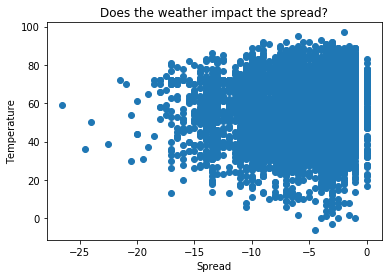

In [34]:
plt.scatter(nfl_spreadspoke['expected_spread_favorite'], nfl_spreadspoke['weather_temperature'])
plt.xlabel('Spread')
plt.ylabel('Temperature')
plt.title('Does the weather impact the spread?')
plt.show()

In [35]:
print("Covariance = {:.2f}\nCorrelation = {:.2f}".format(nfl_spreadspoke['expected_spread_favorite'].cov(nfl_spreadspoke['weather_temperature']), nfl_spreadspoke['expected_spread_favorite'].corr(nfl_spreadspoke['weather_temperature'])))

Covariance = 2.89
Correlation = 0.06


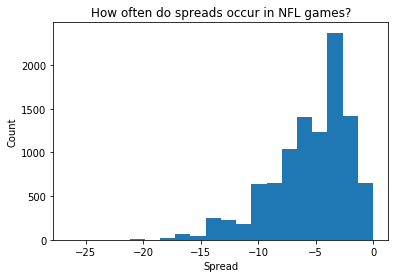

In [36]:
plt.hist(nfl_spreadspoke['expected_spread_favorite'], bins=20)
plt.xlabel('Spread')
plt.ylabel('Count')
plt.title('How often do spreads occur in NFL games?')
plt.show()

In [37]:
home_covered_spreads_fav = []
home_covered_spreads_dog = []
away_covered_spreads_fav = []
away_covered_spreads_dog = []

for index, row in nfl_spreadspoke.iterrows():
    if row['team_home_id'] == row['team_favorite_id'] and row['favorite_covered'] == True:
            home_covered_spreads_fav.append(row['expected_spread_favorite'])
    elif row['team_home_id'] == row['team_favorite_id'] and row['favorite_covered'] == False:
        away_covered_spreads_dog.append(row['expected_spread_favorite'])
    elif row['team_away_id'] == row['team_favorite_id'] and row['favorite_covered'] == True:
        away_covered_spreads_fav.append(row['expected_spread_favorite'])
    elif row['team_away_id'] == row['team_favorite_id'] and row['favorite_covered'] == False:
        home_covered_spreads_dog.append(row['expected_spread_favorite'])

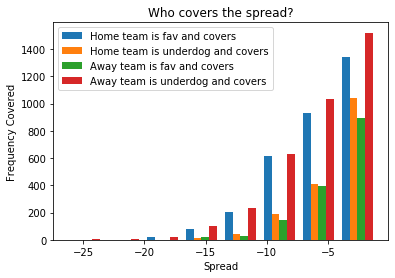

In [38]:
plt.hist([home_covered_spreads_fav,home_covered_spreads_dog,away_covered_spreads_fav,away_covered_spreads_dog], bins = 8, label=['Home team is fav and covers', 'Home team is underdog and covers', 'Away team is fav and covers', 'Away team is underdog and covers'])
plt.xlabel('Spread')
plt.ylabel('Frequency Covered')
plt.title('Who covers the spread?')
plt.legend()
plt.show()

Takeaway from this graph: It is most common for the home team to be favorited and cover or for the away team to be an underdog and cover

In [39]:
most_covered = nfl_spreadspoke['who_covered'].value_counts()[:5].index.tolist()
freq_most_covered = [row['who_covered'] for index, row in nfl_spreadspoke.iterrows() if row['who_covered'] in most_covered]

least_covered = nfl_spreadspoke['who_covered'].value_counts()[27:].index.tolist()
freq_least_covered = [row['who_covered'] for index, row in nfl_spreadspoke.iterrows() if row['who_covered'] in least_covered]


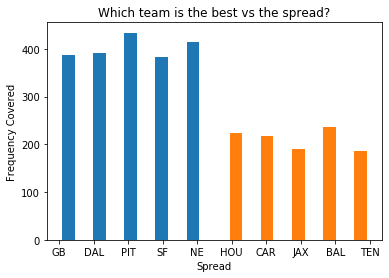

In [40]:
most_covered = nfl_spreadspoke


plt.hist([freq_most_covered, freq_least_covered])
plt.xlabel('Spread')
plt.ylabel('Frequency Covered')
plt.title('Which team is the best vs the spread?')
plt.show()

#### Outputting as a zip with the updated dataframe

In [42]:
nfl_spreadspoke.reset_index()

,index,schedule_week,schedule_playoff,team_home_id,team_away_id,team_favorite_id,expected_spread_favorite,favorite_covered,weather_temperature,weather_wind_mph,who_covered
0,0,Superbowl,True,GB,KC,GB,-14.0,True,54.0,7.0,GB
1,1,Superbowl,True,GB,LV,GB,-13.5,True,60.0,12.0,GB
2,2,Superbowl,True,IND,NYJ,IND,-18.0,False,66.0,12.0,NYJ
3,3,Superbowl,True,KC,MIN,MIN,-12.0,False,55.0,14.0,MIN
4,4,Superbowl,True,IND,DAL,IND,-2.5,True,59.0,11.0,IND
...,...,...,...,...,...,...,...,...,...,...,...
10194,10194,Division,True,GB,SEA,GB,-4.5,True,70.0,0.0,GB
10195,10195,Division,True,KC,HOU,KC,-10.0,True,70.0,0.0,KC
10196,10196,Conference,True,KC,TEN,KC,-7.0,True,70.0,0.0,KC
10197,10197,Conference,True,SF,GB,SF,-8.0,True,70.0,0.0,SF


In [43]:
nfl_spreadspoke.to_csv('nfl_betting.csv', index=False,)